In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Disabling warnings
import warnings
warnings.simplefilter("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df=data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
53893,2014-03-05,MountGinini,10.3,16.1,0.6,NaN,NaN,WNW,30.0,W,...,99.0,98.0,NaN,NaN,NaN,NaN,11.8,12.4,No,Yes
64389,2009-07-18,MelbourneAirport,3.6,12.3,0.0,1.4,5.4,N,63.0,N,...,85.0,58.0,1019.2,1014.6,2.0,7.0,6.1,11.2,No,No
87260,2009-01-30,Cairns,23.8,31.7,0.0,7.2,4.4,SSE,43.0,SSE,...,70.0,70.0,1005.1,1001.0,8.0,7.0,28.8,29.9,No,Yes
53543,2013-03-20,MountGinini,3.7,15.8,0.2,NaN,NaN,ENE,31.0,NNE,...,97.0,62.0,NaN,NaN,NaN,NaN,6.4,13.5,No,No
38249,2013-12-15,WaggaWagga,12.6,31.8,0.0,11.2,12.9,WSW,39.0,ENE,...,52.0,20.0,1017.0,1013.9,4.0,4.0,21.8,30.1,No,No


In [3]:
data.sample(7)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
101872,2015-08-15,MountGambier,2.2,14.8,0.8,0.4,6.6,W,22.0,NE,...,93.0,62.0,1032.5,1030.2,3.0,7.0,10.0,14.4,No,No
78843,2011-06-04,Watsonia,10.6,16.5,0.8,2.0,7.1,WSW,37.0,WNW,...,78.0,47.0,1015.0,1015.1,1.0,5.0,10.7,14.7,No,No
34160,2010-10-03,SydneyAirport,14.7,20.2,10.2,1.0,1.2,E,56.0,NE,...,89.0,75.0,1030.1,1027.8,8.0,7.0,16.3,19.6,Yes,Yes
72306,2014-06-26,Mildura,7.5,18.6,0.0,2.8,8.4,WNW,35.0,NW,...,80.0,50.0,1023.2,1021.0,4.0,7.0,9.7,18.1,No,No
130559,2010-06-22,Hobart,6.0,14.0,0.0,1.0,5.2,NNW,24.0,NNW,...,86.0,54.0,1040.4,1038.9,7.0,1.0,8.4,13.5,No,No
18671,2010-07-11,NorahHead,13.1,17.9,0.0,NaN,NaN,NNW,37.0,N,...,84.0,74.0,1022.6,1020.4,NaN,NaN,15.5,17.4,No,No
145055,2016-05-17,Uluru,11.5,29.0,0.0,NaN,NaN,E,24.0,ESE,...,38.0,16.0,1019.2,1016.3,6.0,1.0,18.6,27.9,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 53893 to 106610
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9885 non-null   float64
 3   MaxTemp        9908 non-null   float64
 4   Rainfall       9766 non-null   float64
 5   Evaporation    5671 non-null   float64
 6   Sunshine       5190 non-null   float64
 7   WindGustDir    9294 non-null   object 
 8   WindGustSpeed  9299 non-null   float64
 9   WindDir9am     9225 non-null   object 
 10  WindDir3pm     9705 non-null   object 
 11  WindSpeed9am   9869 non-null   float64
 12  WindSpeed3pm   9787 non-null   float64
 13  Humidity9am    9795 non-null   float64
 14  Humidity3pm    9685 non-null   float64
 15  Pressure9am    8939 non-null   float64
 16  Pressure3pm    8946 non-null   float64
 17  Cloud9am       6157 non-null   float64
 18  C

In [5]:
df.isnull().sum() 

Date                0
Location            0
MinTemp           115
MaxTemp            92
Rainfall          234
Evaporation      4329
Sunshine         4810
WindGustDir       706
WindGustSpeed     701
WindDir9am        775
WindDir3pm        295
WindSpeed9am      131
WindSpeed3pm      213
Humidity9am       205
Humidity3pm       315
Pressure9am      1061
Pressure3pm      1054
Cloud9am         3843
Cloud3pm         4093
Temp9am           139
Temp3pm           244
RainToday         234
RainTomorrow      216
dtype: int64

In [14]:
df["RainToday"].value_counts()

No     7527
Yes    2151
Name: RainToday, dtype: int64

In [15]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.728247,0.100657,0.478465,0.074265,0.179900,0.201265,0.189653,-0.233585,0.003530,-0.448383,-0.457386,0.075686,0.008458,0.899891,0.701287
MaxTemp,0.728247,1.000000,-0.078141,0.618893,0.464698,0.067957,0.027373,0.063801,-0.502276,-0.513200,-0.328690,-0.423761,-0.283063,-0.285870,0.884431,0.984373
Rainfall,0.100657,-0.078141,1.000000,-0.071584,-0.215125,0.117699,0.081161,0.037784,0.230887,0.251007,-0.181761,-0.136258,0.201107,0.160503,0.002926,-0.084876
Evaporation,0.478465,0.618893,-0.071584,1.000000,0.364754,0.206887,0.213825,0.139340,-0.533629,-0.417163,-0.269215,-0.300015,-0.198467,-0.202533,0.569424,0.607280
Sunshine,0.074265,0.464698,-0.215125,0.364754,1.000000,-0.026750,0.018391,0.061768,-0.496988,-0.627190,0.036204,-0.024482,-0.670986,-0.694954,0.289946,0.486431
WindGustSpeed,0.179900,0.067957,0.117699,0.206887,-0.026750,1.000000,0.608352,0.692277,-0.226794,-0.033425,-0.460727,-0.417495,0.045298,0.089464,0.155743,0.030662
WindSpeed9am,0.201265,0.027373,0.081161,0.213825,0.018391,0.608352,1.000000,0.518949,-0.275655,-0.035102,-0.230920,-0.182464,0.009898,0.046278,0.147510,0.015077
WindSpeed3pm,0.189653,0.063801,0.037784,0.139340,0.061768,0.692277,0.518949,1.000000,-0.161013,0.007698,-0.301431,-0.263420,0.029952,0.006380,0.177126,0.039153
Humidity9am,-0.233585,-0.502276,0.230887,-0.533629,-0.496988,-0.226794,-0.275655,-0.161013,1.000000,0.674204,0.127969,0.176155,0.459380,0.374902,-0.472464,-0.497239
Humidity3pm,0.003530,-0.513200,0.251007,-0.417163,-0.627190,-0.033425,-0.035102,0.007698,0.674204,1.000000,-0.022133,0.059105,0.508974,0.528871,-0.226170,-0.562434


# SOME VISUALIZATION

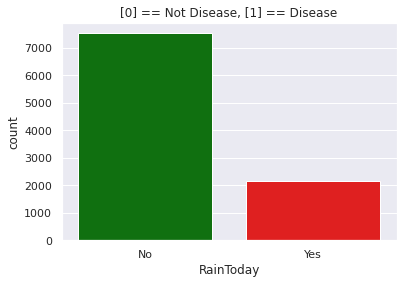

In [16]:
sns.countplot(df.RainToday, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

(16.5, -0.5)

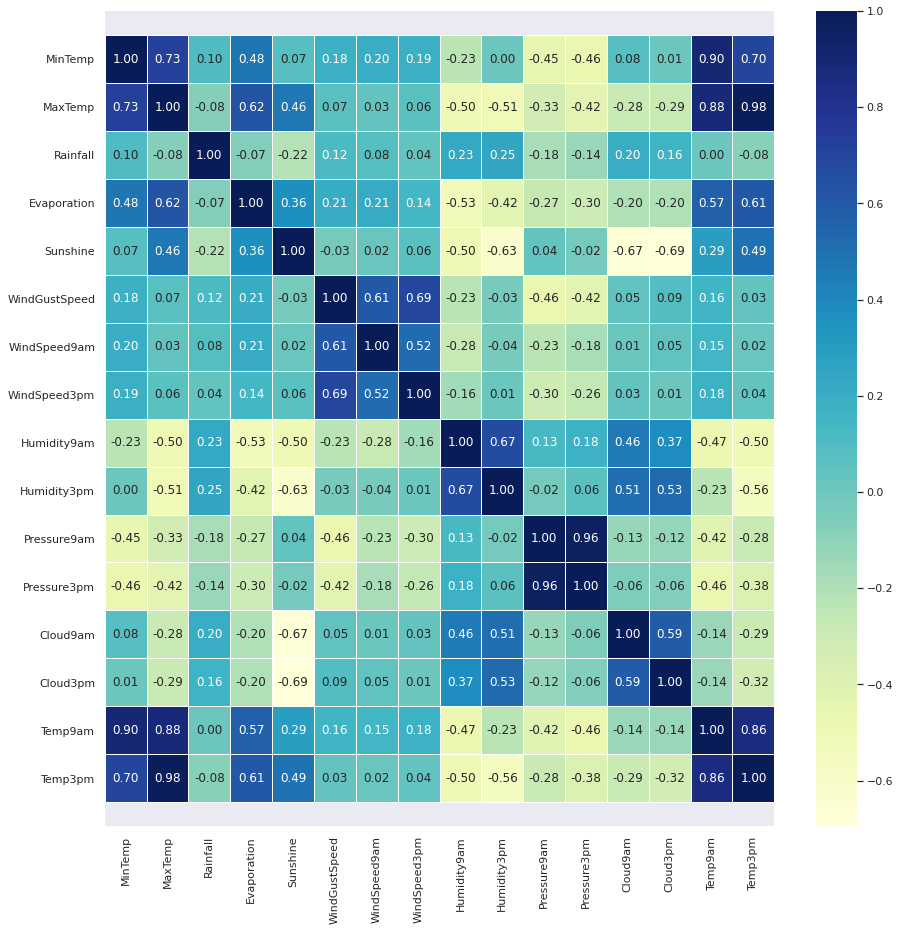

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [6]:

df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
df[['RainToday', 'RainTomorrow']].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [23]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5076,141,4602,0.0,14.3
Evaporation,float64,5554,163,4124,0.0,55.4
Cloud3pm,float64,5798,10,3880,0.0,8.0
Cloud9am,float64,6055,10,3623,0.0,8.0
Pressure3pm,float64,8710,426,968,978.2,1038.2
Pressure9am,float64,8714,438,964,982.2,1040.9
WindDir9am,object,8971,17,707,NaN,NaN
WindGustDir,object,9041,17,637,NaN,NaN
WindGustSpeed,float64,9046,55,632,9.0,120.0
WindDir3pm,object,9421,17,257,NaN,NaN


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder


lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [25]:
df.drop(['Location','WindDir9am','WindDir3pm'], axis=1, inplace=True) 

df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], prefix = ['WindGustDir'])

In [26]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5076,141,4602,0.0,14.3
Evaporation,float64,5554,163,4124,0.0,55.4
Cloud3pm,float64,5798,10,3880,0.0,8.0
Cloud9am,float64,6055,10,3623,0.0,8.0
Pressure3pm,float64,8710,426,968,978.2,1038.2
Pressure9am,float64,8714,438,964,982.2,1040.9
WindGustSpeed,float64,9046,55,632,9.0,120.0
Humidity3pm,float64,9433,102,245,0.0,100.0
WindSpeed3pm,float64,9501,35,177,0.0,65.0
Temp3pm,float64,9503,408,175,-3.9,46.2


__________Data Types__________

float64    16
uint8      15
object      3
int64       2
Name: Types, dtype: int64


In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [28]:
df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [30]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [32]:
summary(df2)

,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,9678,9,0,0.0,8.0
WindGustDir_N,float64,9678,2,0,0.0,1.0
WindSpeed3pm,float64,9678,34,0,0.0,65.0
WindGustSpeed,float64,9678,54,0,9.0,120.0
WindGustDir_WSW,float64,9678,2,0,0.0,1.0
WindGustDir_WNW,float64,9678,2,0,0.0,1.0
WindGustDir_W,float64,9678,2,0,0.0,1.0
WindGustDir_SW,float64,9678,2,0,0.0,1.0
WindGustDir_SSW,float64,9678,2,0,0.0,1.0
WindGustDir_SSE,float64,9678,2,0,0.0,1.0


__________Data Types__________

float64    33
Name: Types, dtype: int64


In [33]:
#Normalization of variabales

x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

In [34]:
#Test-Train splitting

from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
#  Modeling of Logistic R. Method
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [38]:
lr #We can see what there is in lr(icinde hangi secenekler vargormek icin) 

#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   #intercept_scaling=1, l1_ratio=None, max_iter=100,
                  # multi_class='auto', n_jobs=None, penalty='l2',
                  # random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                  # warm_start=False)

LogisticRegression(solver='liblinear')

In [39]:
lr.intercept_  

array([-3.16698593])

In [40]:
lr.coef_ 

array([[ 0.58477274,  0.33386801,  0.36252187, -0.33330584, -1.84607175,
         4.72531006, -0.65800706, -0.98523134,  0.20245523,  4.53138598,
         0.64262613, -3.74735432, -0.01919491,  0.67946322,  0.30265066,
        -0.52252148,  0.45183328, -0.21864442, -0.0787323 ,  0.44164891,
        -0.39465707, -0.12161654,  0.176225  ,  0.1857465 , -0.1226368 ,
        -0.06889804, -0.13202916, -0.25271457, -0.18182265, -0.11661126,
         0.1685874 , -0.0841898 ]])

In [41]:
#Lets control the succes(score)
#prediction(accuracy_score,confusion m.) on test_data
l_score=accuracy_score(y_test,y_pred)
l_score
#The y predicted by the y in the test are compared(test deki y ile tahmin edilen yler karsilastiriliyor.Dogru tahmin etme yuzdesi bulunuyor)

0.8481404958677686

In [42]:
c_l=confusion_matrix(y_test,y_pred)# We found the numbers of guessing with confusion matrix, 31 for 1 correct guess, 0 for 35 correct guess
c_l                               #The top was imported.
#confusion matrixle tahmin etme sayilarini bulduk,1 icin 31 i dogru tahmin,0 icin 35 i dogru tahmin


array([[2179,  135],
       [ 306,  284]])

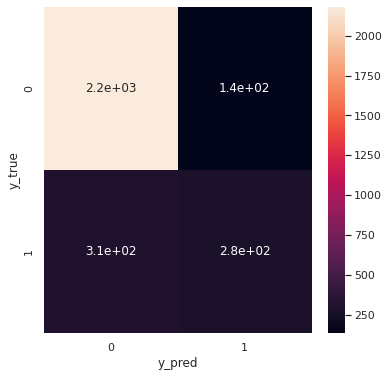

In [43]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=lr.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# NAIVE BAYES METHOD

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)
y_pred[:10]

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0.])

In [45]:
nb  #we can look at which option is there in GaussionNB

GaussianNB()

In [47]:
# Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data
n_score=accuracy_score(y_test,y_pred)
n_score

0.7679063360881543

In [48]:
c_nb=confusion_matrix(y_test,y_pred)
c_nb
#confusion matrixle tahmin etme sayilarini bulduk,1 icin 32 i dogru tahmin,0 icin 30 i dogru tahmin
#En ustte import edildi.

array([[1847,  467],
       [ 207,  383]])

In [49]:
#TUNING THE PREDICTION: WE can tune our prediction

y_probs = nb.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.45 else 0 for i in y_probs]
y_pred[0:10]

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

In [50]:
nb_tuned_bestscore=accuracy_score(y_test,y_pred)
nb_tuned_bestscore

0.7641184573002755

In [51]:
cmnb_best=confusion_matrix(y_test,y_pred) 
cmnb_best

array([[1829,  485],
       [ 200,  390]])

# KNN METHOD

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
knn 

KNeighborsClassifier(n_neighbors=3)

In [56]:
#Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.8109504132231405

In [57]:
c_knn=confusion_matrix(y_test,y_pred)
c_knn

array([[2113,  201],
       [ 348,  242]])

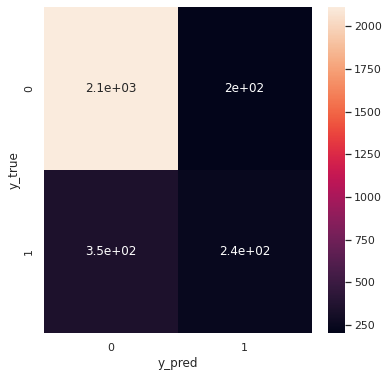

In [58]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn.predict(x_test)
cmknn=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [59]:
#CLASSICICATION REPORT: we can also see classification report.
knn.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.])

In [60]:
knn.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

array([[1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [61]:
#TUNING THE PREDICTION: WE can tune our prediction
RMSE = []   # ERROR ON TRAIN DATA

for k in range(30):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.2322055074649976
k = 3 için RMSE değeri:  0.27035147303321627
k = 4 için RMSE değeri:  0.2887230726762252
k = 5 için RMSE değeri:  0.29764353520248
k = 6 için RMSE değeri:  0.3028855529240832
k = 7 için RMSE değeri:  0.30861158104937964
k = 8 için RMSE değeri:  0.31264205510552834
k = 9 için RMSE değeri:  0.3156064502898066
k = 10 için RMSE değeri:  0.31845832869535917
k = 11 için RMSE değeri:  0.3206540103540811
k = 12 için RMSE değeri:  0.32235450454186604
k = 13 için RMSE değeri:  0.3232791523251045
k = 14 için RMSE değeri:  0.32455156595132195
k = 15 için RMSE değeri:  0.32594206716106544
k = 16 için RMSE değeri:  0.3275081149532035
k = 17 için RMSE değeri:  0.32870495783677667
k = 18 için RMSE değeri:  0.3300703341898758
k = 19 için RMSE değeri:  0.3312889634549777
k = 20 için RMSE değeri:  0.33217172859505517
k = 21 için RMSE değeri:  0.33307966623787283
k = 22 için RMSE değeri:  0.3337929666133031
k = 23 için RMSE değeri:  

In [ ]:
from sklearn.model_selection import GridSearchCV  
#We use Grid for tuni
knn_params = {'n_neighbors': np.arange(1,30,1)} #we obta
knn = KNeighborsRegressor()

In [65]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) #cross validation yontemi kullaniliyor.nesnesi tanimlandi
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [66]:
print("Best Score:"+str(knn_cv_model.best_score_))
print("Best Parameters:"+str(knn_cv_model.best_params_))

Best Score:0.26724970378279267
Best Parameters:{'n_neighbors': 17}


In [67]:
knn_tuned =KNeighborsClassifier(n_neighbors = 21)
knn_tuned = knn_tuned.fit(x_train,y_train)
y_pred = knn_tuned.predict(x_test)
knn_tuned_score=accuracy_score(y_test,y_pred)
knn_tuned_score

0.8226584022038568

In [68]:
knn_tune2 =KNeighborsClassifier(n_neighbors = 21,metric='hamming')
knn_tune2.fit(x_train,y_train)
y_pred = knn_tune2.predict(x_test)
knn_tuned_bestscore=accuracy_score(y_test,y_pred)
knn_tuned_bestscore

0.8171487603305785

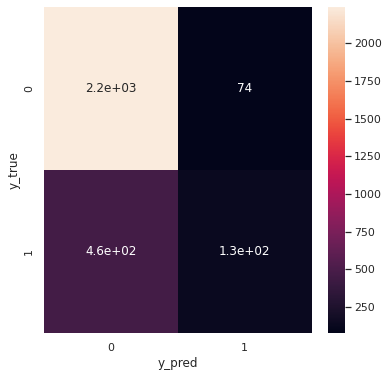

In [69]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=knn_tune2.predict(x_test)
cmknn_best=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn_best, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# SVM(SUPPORT VECTOR MACHINES)

In [71]:
from sklearn.svm import SVC
svm = SVC(C=5,degree=9,kernel = 'poly')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
svm

SVC(C=5, degree=9, kernel='poly')

In [72]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data


In [73]:
svm_score1 = accuracy_score(y_test,y_pred)
svm_score1

0.8088842975206612

In [74]:
c_svm=confusion_matrix(y_test,y_pred)
c_svm

array([[2026,  288],
       [ 267,  323]])

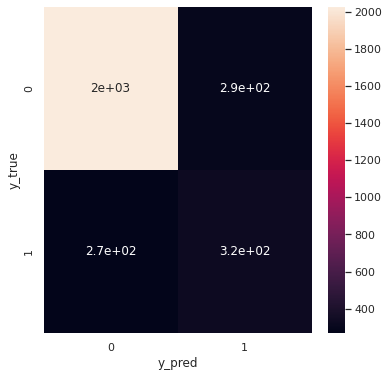

In [75]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=svm.predict(x_test)
cmsvm=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmsvm, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [76]:
#EN UYGUN C VE GAMMA DEGERI BULMA
svc_params ={"C":[0.00001,0.001,0.01,5,10,50,100],
            "gamma":[0.0001,0.001,0.01,1,5,10,50,100]}
svc =SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(x_train,y_train)
print("Best Parameters:"+str(svc_cv_model.best_params_))

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  7.6min finished


Best Parameters:{'C': 100, 'gamma': 0.01}


In [77]:
?svc_cv_model

Type:        GridSearchCV
String form:
GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
           param_grid={'C': [1e-05, 0.001, 0.01 <...>                       'gamma': [0.0001, 0.001, 0.01, 1, 5, 10, 50, 100]},
           verbose=2)
File:        /opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py
Docstring:  
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`

In [78]:
svm_score2 = accuracy_score(y_test,y_pred)
svm_score2

0.8088842975206612

In [80]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune2 = SVC(C=100,degree=9,kernel = 'linear')
svm_tune2.fit(x_train,y_train)
y_pred = svm_tune2.predict(x_test)
accuracy_score(y_test,y_pred)

0.8553719008264463

In [ ]:
#we changed the kernel,We can use linear,poly,rbf...
svm_tune3 = SVC(C=100,degree=9,kernel = 'rbf')
svm_tune3.fit(x_train,y_train)
y_pred = svm_tune3.predict(x_test)
accuracy_score(y_test,y_pred)

# RANDOM FOREST METHOD

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
rf

In [ ]:
#Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data
rf_score=accuracy_score(y_test,y_pred)
rf_score

In [ ]:
c_rf=confusion_matrix(y_test,y_pred)
c_rf

In [ ]:
#HEATMAP IN CONFUSION MATRIX: We can see the confusion matrix in Heatmap
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=rf.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#CLASSICICATION REPORT: we can also see classification report.
print(classification_report(y_test,y_pred)) #yukarda import edildi

In [ ]:
rf.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

In [ ]:
rf.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari

n_estimators= 1 --> Accuracy: 77.37603305785123 %
n_estimators= 2 --> Accuracy: 81.19834710743802 %
n_estimators= 3 --> Accuracy: 81.40495867768594 %
n_estimators= 4 --> Accuracy: 83.16115702479338 %
n_estimators= 5 --> Accuracy: 82.43801652892562 %
n_estimators= 6 --> Accuracy: 83.33333333333334 %
n_estimators= 7 --> Accuracy: 83.40220385674931 %
n_estimators= 8 --> Accuracy: 84.12534435261708 %
n_estimators= 9 --> Accuracy: 83.71212121212122 %
n_estimators= 10 --> Accuracy: 84.64187327823691 %
n_estimators= 11 --> Accuracy: 83.91873278236915 %
n_estimators= 12 --> Accuracy: 84.6763085399449 %
n_estimators= 13 --> Accuracy: 84.366391184573 %
n_estimators= 14 --> Accuracy: 84.84848484848484 %
n_estimators= 15 --> Accuracy: 84.71074380165288 %
n_estimators= 16 --> Accuracy: 84.88292011019284 %
n_estimators= 17 --> Accuracy: 84.6763085399449 %
n_estimators= 18 --> Accuracy: 85.02066115702479 %
n_estimators= 19 --> Accuracy: 84.57300275482093 %
n_estimators= 20 --> Accuracy: 84.5730027548

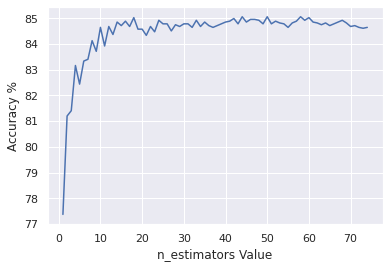

In [81]:
#TUNING THE PREDICTION: WE can tune our prediction
from sklearn.ensemble import RandomForestClassifier  #n_estimotors=11 is best
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(x_train, y_train)
    score_list.append(100*rf2.score(x_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(x_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

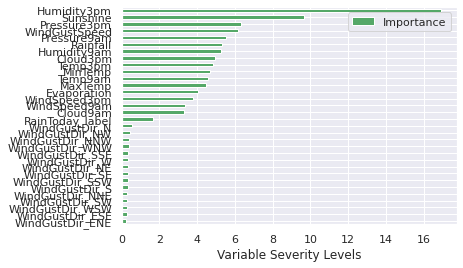

In [82]:
#Lets look at importance 6 variables
Importance = pd.DataFrame({"Importance": rf.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Variable Severity Levels");

In [84]:
rf_2 = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf_2.predict(x_test)
rf_2_score=accuracy_score(y_test, y_pred)
rf_2_score

0.8519283746556474

In [85]:
c_rf2=confusion_matrix(y_test,y_pred)
c_rf2

array([[2195,  119],
       [ 311,  279]])

In [86]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [87]:
rf_model1 = RandomForestClassifier()

rf_cv_model1 = GridSearchCV(rf_model1, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [88]:
rf_tuned1 = RandomForestClassifier(max_depth = 2, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned1.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features=2, n_estimators=500)

In [89]:
y_pred = rf_tuned1.predict(x_test)
rf_tuned_score=accuracy_score(y_test, y_pred)
rf_tuned_score

0.796831955922865

# #DECISION TREE METHOD

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [91]:
y_pred = dtc.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [92]:
# Lets control the succes(score) prediction(accuracy_score,confusion m.) on test_data
dtc_score=accuracy_score(y_test,y_pred)
dtc_score

0.7865013774104683

In [93]:
c_dtc=confusion_matrix(y_test,y_pred)
c_dtc

array([[1982,  332],
       [ 288,  302]])

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      2314
         1.0       0.48      0.51      0.49       590

    accuracy                           0.79      2904
   macro avg       0.67      0.68      0.68      2904
weighted avg       0.79      0.79      0.79      2904



In [ ]:
tree_grid = {"max_": range(1,10),
            "min_" : list(range(2,50)) }

In [100]:
tree1 = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree1, tree_grid, cv = 10, n_jobs = -1, verbose = 2)
tree_cv_model = tree_cv.fit(x_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.0min finished


In [102]:
print("Best Parameters: " + str(tree_cv_model.best_params_))

Best Parameters: {'max_depth': 6, 'min_samples_split': 42}


In [103]:
tree1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)
tree_tuned1 = tree1.fit(x_train, y_train)

In [104]:
y_pred = tree_tuned1.predict(x_test)
dtc_tuned_bestscore=accuracy_score(y_test, y_pred)
dtc_tuned_bestscore

0.8360881542699724

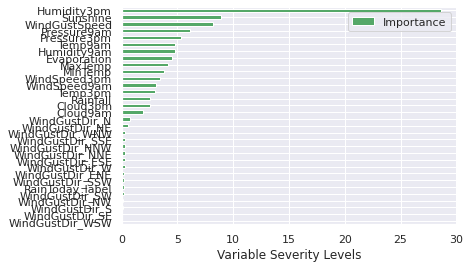

In [105]:
#Lets look at 6 importance variables

Importance = pd.DataFrame({"Importance": dtc.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Variable Severity Levels");

In [106]:
dtc2 = RandomForestClassifier().fit(x_train, y_train)
y_pred = dtc2.predict(x_test)
dtc2_score=accuracy_score(y_test, y_pred)
dtc2_score

0.8539944903581267

In [107]:
c_dtc2=confusion_matrix(y_test,y_pred)
c_dtc2

array([[2197,  117],
       [ 307,  283]])

In [108]:
dtc_tuned1 = RandomForestClassifier(max_depth = 2, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 500)
dtc_tuned1.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features=2, n_estimators=500)

In [109]:
y_pred = dtc_tuned1.predict(x_test)
dtc_tuned_bestscore=accuracy_score(y_test, y_pred)
dtc_tuned_bestscore

0.796831955922865

In [110]:
c_bestdtc=confusion_matrix(y_test,y_pred)
c_bestdtc

array([[2314,    0],
       [ 590,    0]])

# LETS SEE ALL SCORE OF CLASSIFICATIONS METHODS

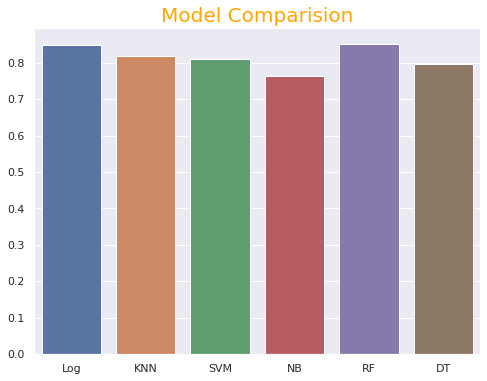

In [111]:
indexx = ["Log","KNN","SVM","NB","RF","DT"]
regressions = [l_score,knn_tuned_bestscore,svm_score1,nb_tuned_bestscore,rf_2_score,dtc_tuned_bestscore]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

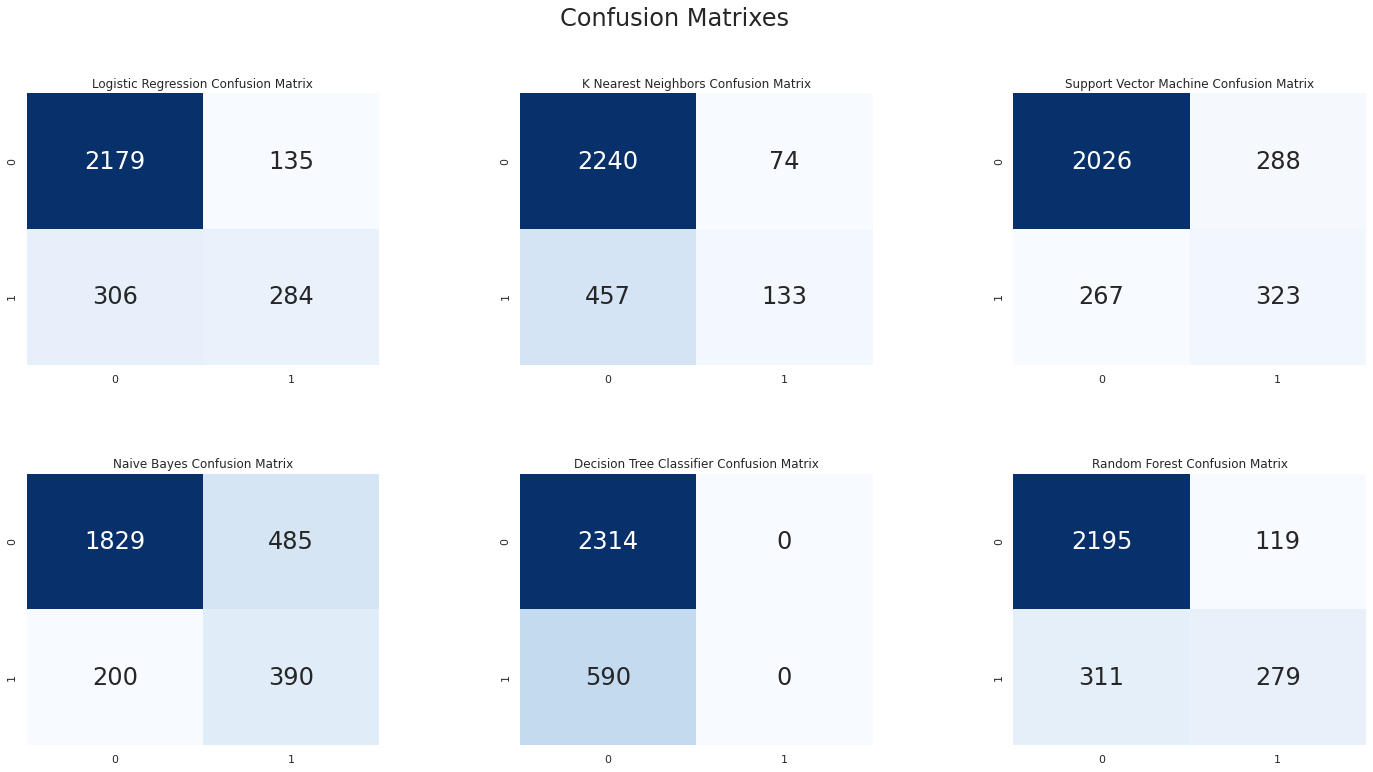

In [112]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(c_l,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmknn_best,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(c_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cmnb_best,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(c_bestdtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(c_rf2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()